<h1 align="center">
    <span style="color:#e4ecee; background-color:#157375; padding:8px; border-radius:10px">Hands-on : 35 Insights</span>
</h1>

<div align="center"> 
    <img src='https://www.tripcentral.ca/blog/wp-content/uploads/2015/10/TravelGuide-Chicago-feat-640x240.png'>
</div>

In [1]:
# Importing the needed extensions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import folium
from folium.plugins import HeatMap

# Making a dataframe out of the dataset
chicago_crimes = pd.read_csv('datasets\\Chicago_Crimes.csv')
# Checking if the dataframe is working (it is working)
chicago_crimes

ID Case Number                    Date                  Block  \
0       13439321    JH237424  04/14/2024 12:00:00 AM    040XX S PRAIRIE AVE   
1       13437420    JH234779  04/14/2024 12:00:00 AM      023XX W CERMAK RD   
2       13428676    JH224478  04/14/2024 12:00:00 AM    043XX W LE MOYNE ST   
3       13429357    JH225293  04/14/2024 12:00:00 AM       039XX W ADAMS ST   
4       13430098    JH226395  04/14/2024 12:00:00 AM       011XX W 112TH PL   
...          ...         ...                     ...                    ...   
249118  13805239    JJ217509  04/12/2025 12:00:00 AM     029XX W LOGAN BLVD   
249119  13804023    JJ215813  04/12/2025 12:00:00 AM    094XX S HARVARD AVE   
249120  13803926    JJ215943  04/12/2025 12:00:00 AM  084XX S VINCENNES AVE   
249121  13803475    JJ215338  04/12/2025 12:00:00 AM    050XX S ABERDEEN ST   
249122  13804512    JJ216668  04/12/2025 12:00:00 AM    012XX W CARROLL AVE   

        IUCR         Primary Type                          Description  \
0       0890                THEFT                        FROM BUILDING   
1       2825        OTHER OFFENSE              HARASSMENT BY TELEPHONE   
2       0917  MOTOR VEHICLE THEFT        CYCLE, SCOOTER, BIKE WITH VIN   
3       143A    WEAPONS VIOLATION        UNLAWFUL POSSESSION - HANDGUN   
4       0890                THEFT                        FROM BUILDING   
...      ...                  ...                                  ...   
249118  2826        OTHER OFFENSE       HARASSMENT BY ELECTRONIC MEANS   
249119  0430              BATTERY  AGGRAVATED - OTHER DANGEROUS WEAPON   
249120  0486              BATTERY              DOMESTIC BATTERY SIMPLE   
249121  0530              ASSAULT  AGGRAVATED - OTHER DANGEROUS WEAPON   
249122  0710                THEFT             THEFT FROM MOTOR VEHICLE   

                Location Description  Arrest  Domestic  ...  Ward  \
0                          APARTMENT   False     False  ...     3   
1       COMMERCIAL / BUSINESS OFFICE   False     False  ...    25   
2                             STREET   False     False  ...    36   
3                             STREET    True     False  ...    28   
4                          RESIDENCE   False     False  ...    21   
...                              ...     ...       ...  ...   ...   
249118                     APARTMENT   False     False  ...     1   
249119                        STREET   False     False  ...     9   
249120                     APARTMENT   False      True  ...    21   
249121                        STREET    True     False  ...    20   
249122                        STREET   False     False  ...    27   

        Community Area  FBI Code  X Coordinate Y Coordinate  Year  \
0                 38.0        06     1178707.0    1878256.0  2024   
1                 31.0        26     1161210.0    1889347.0  2024   
2                 23.0        07     1146960.0    1909501.0  2024   
3                 26.0        15     1150158.0    1898721.0  2024   
4                 75.0        06     1170856.0    1830157.0  2024   
...                ...       ...           ...          ...   ...   
249118            22.0        26     1156478.0    1917149.0  2025   
249119            49.0       04B     1175694.0    1842631.0  2025   
249120            71.0       08B     1173850.0    1848976.0  2025   
249121            61.0       04A     1169838.0    1871348.0  2025   
249122            28.0        06     1168216.0    1902390.0  2025   

                    Updated On   Latitude  Longitude  \
0       12/21/2024 03:40:46 PM  41.821236 -87.619921   
1       12/21/2024 03:40:46 PM  41.852052 -87.683801   
2       12/21/2024 03:40:46 PM  41.907640 -87.735587   
3       12/21/2024 03:40:46 PM  41.877997 -87.724121   
4       12/21/2024 03:40:46 PM  41.689421 -87.650123   
...                        ...        ...        ...   
249118  04/19/2025 03:41:24 PM  41.928440 -87.700416   
249119  04/19/2025 03:41:24 PM  41.723545 -87.632040   
249120  04/19/

In [2]:
# Cleaning the date column
chicago_crimes['Date'] = chicago_crimes['Date'].astype(str)
chicago_crimes['Date'] = chicago_crimes['Date'].replace('/', '-')
chicago_crimes['Date'] = chicago_crimes['Date'].str.strip()
chicago_crimes['Date'] = pd.to_datetime(chicago_crimes['Date'], dayfirst=True, errors='coerce')

# Cleaning the null values
chicago_crimes['Location Description'] = chicago_crimes['Location Description'].fillna('Unaccounted')
chicago_crimes['Community Area'] = chicago_crimes['Community Area'].fillna(chicago_crimes['Community Area'].mode()[0])
chicago_crimes['X Coordinate'] = chicago_crimes['X Coordinate'].fillna(chicago_crimes['X Coordinate'].mode()[0])
chicago_crimes['Y Coordinate'] = chicago_crimes['Y Coordinate'].fillna(chicago_crimes['Y Coordinate'].mode()[0])
chicago_crimes['Latitude'] = chicago_crimes['Latitude'].fillna(chicago_crimes['Latitude'].mode()[0])
chicago_crimes['Longitude'] = chicago_crimes['Longitude'].fillna(chicago_crimes['Longitude'].mode()[0])
chicago_crimes['Location'] = chicago_crimes['Location'].fillna(chicago_crimes['Location'].mode()[0])
chicago_crimes.isnull().sum()

# Extracting other data classification our of the date
chicago_crimes['Month'] = chicago_crimes['Date'].dt.month_name()
chicago_crimes['Month_Number'] = chicago_crimes['Date'].dt.month
chicago_crimes['Day'] = chicago_crimes['Date'].dt.day
chicago_crimes['DayOfWeek'] = chicago_crimes['Date'].dt.dayofweek
# I extracted the time also because I wanted to know what time accidents usually happen
chicago_crimes['Crime Hour'] = chicago_crimes['Date'].dt.hour
chicago_crimes['Full Time'] = chicago_crimes['Date'].dt.strftime('%I:%M %p')
chicago_crimes['Time'] = chicago_crimes['Date'].dt.strftime('%I %p')
chicago_crimes.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Month_Number            0
Day                     0
DayOfWeek               0
Crime Hour              0
Full Time               0
Time                    0
dtype: int64

In [3]:
# Changing the data types
chicago_crimes['Primary Type'] = chicago_crimes['Primary Type'].astype('category')
chicago_crimes['Description'] = chicago_crimes['Description'].astype('category')
chicago_crimes['Location Description'] = chicago_crimes['Location Description'].astype('category')
chicago_crimes['Year'] = chicago_crimes['Year'].astype('category')
chicago_crimes['Day'] = chicago_crimes['Day'].astype('category')
chicago_crimes['Month'] = chicago_crimes['Month'].astype('category')
chicago_crimes['Month_Number'] = chicago_crimes['Month_Number'].astype('category')
chicago_crimes['Updated On'] = chicago_crimes['Updated On'].astype('datetime64[ns]')
chicago_crimes['Full Time'] = chicago_crimes['Full Time'].astype('datetime64[ns]')
chicago_crimes.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                  category
Description                   category
Location Description          category
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                          category
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
Month                         category
Month_Number                  category
Day                           category
DayOfWeek                

In [4]:
chicago_crimes

ID Case Number       Date                  Block  IUCR  \
0       13439321    JH237424 2024-04-14    040XX S PRAIRIE AVE  0890   
1       13437420    JH234779 2024-04-14      023XX W CERMAK RD  2825   
2       13428676    JH224478 2024-04-14    043XX W LE MOYNE ST  0917   
3       13429357    JH225293 2024-04-14       039XX W ADAMS ST  143A   
4       13430098    JH226395 2024-04-14       011XX W 112TH PL  0890   
...          ...         ...        ...                    ...   ...   
249118  13805239    JJ217509 2025-12-04     029XX W LOGAN BLVD  2826   
249119  13804023    JJ215813 2025-12-04    094XX S HARVARD AVE  0430   
249120  13803926    JJ215943 2025-12-04  084XX S VINCENNES AVE  0486   
249121  13803475    JJ215338 2025-12-04    050XX S ABERDEEN ST  0530   
249122  13804512    JJ216668 2025-12-04    012XX W CARROLL AVE  0710   

               Primary Type                          Description  \
0                     THEFT                        FROM BUILDING   
1             OTHER OFFENSE              HARASSMENT BY TELEPHONE   
2       MOTOR VEHICLE THEFT        CYCLE, SCOOTER, BIKE WITH VIN   
3         WEAPONS VIOLATION        UNLAWFUL POSSESSION - HANDGUN   
4                     THEFT                        FROM BUILDING   
...                     ...                                  ...   
249118        OTHER OFFENSE       HARASSMENT BY ELECTRONIC MEANS   
249119              BATTERY  AGGRAVATED - OTHER DANGEROUS WEAPON   
249120              BATTERY              DOMESTIC BATTERY SIMPLE   
249121              ASSAULT  AGGRAVATED - OTHER DANGEROUS WEAPON   
249122                THEFT             THEFT FROM MOTOR VEHICLE   

                Location Description  Arrest  Domestic  ...   Latitude  \
0                          APARTMENT   False     False  ...  41.821236   
1       COMMERCIAL / BUSINESS OFFICE   False     False  ...  41.852052   
2                             STREET   False     False  ...  41.907640   
3                             STREET    True     False  ...  41.877997   
4                          RESIDENCE   False     False  ...  41.689421   
...                              ...     ...       ...  ...        ...   
249118                     APARTMENT   False     False  ...  41.928440   
249119                        STREET   False     False  ...  41.723545   
249120                     APARTMENT   False      True  ...  41.740998   
249121                        STREET    True     False  ...  41.802477   
249122                        STREET   False     False  ...  41.887694   

        Longitude                       Location     Month Month_Number  Day  \
0      -87.619921  (41.821236024, -87.619920712)     April            4   14   
1      -87.683801  (41.852051675, -87.683800849)     April            4   14   
2      -87.735587  (41.907640473, -87.735587478)     April            4   14   
3      -87.724121  (41.877997275, -87.724120826)     April            4   14   
4      -87.650123    (41.6894214, -87.650123247)     April            4   14   
...           ...                            ...       ...          ...  ...   
249118 -87.700416  (41.928439867, -87.700415972)  December           12    4   
249119 -87.632040  (41.723545182, -87.632039508)  December           12    4   
249120 -87.638606   (41.74099774, -87.638606337)  December           12    4   
249121 -87.652657  (41.802477219, -87.652657244)  December           12    4   
249122 -87.657710  (41.887694407, -87.657710204)  December           12    4   

        DayOfWeek Crime Hour  Full Time   Time  
0               6          0 2025-10-04  12 AM  
1               6          0 2025-10-04  12 AM  
2               6          0 2025-10-04  12 AM  
3               6          0 2025-10-04  12 AM  
4               6          0 2025-10-04  12 AM  
...           ...        ...        ...    ...  
249118          3          0 2025-10-04  12 AM  
249119          3          0 2025-10-04  12 AM  
249120          3          0 2025-10-04  

<h1 style='color:#157375'>What is the distribution in terms of primary type of crime?</h1>

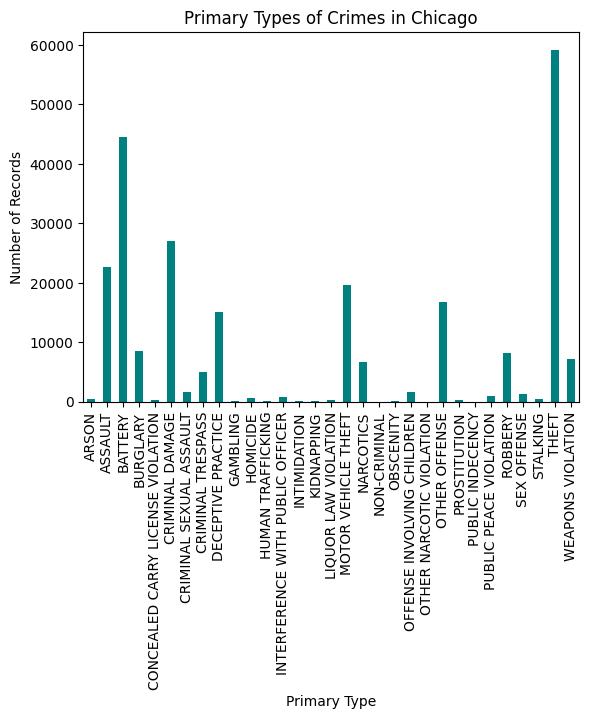

In [5]:
time_of_crimes = chicago_crimes.groupby('Primary Type').size()
time_of_crimes.plot(kind='bar', color='teal')
plt.title('Primary Types of Crimes in Chicago')
plt.ylabel('Number of Records')
plt.show()

<div style="display:flex; align-items:center;">
    <img src='https://static.vecteezy.com/system/resources/previews/014/721/501/original/illustration-of-a-thief-stealing-a-lot-of-money-and-running-away-money-falling-masked-criminal-bad-people-theft-work-etc-flat-illustration-free-vector.jpg' width=200px>
    <h2 >
        <strong><i>INSIGHT 1: </i></strong> 
        The graph shows that theft is the usual type of crime committed in Chicago with almost 60,000 of data. It looks like Chicago has been dealing with different kinds of theft, from
        <a href=https://www.archyde.com/chicago-women-involved-in-dramatic-high-speed-pursuit-following-retail-theft/>retail theft</a> to 
        <a href='https://www.cbsnews.com/chicago/news/chicago-drop-in-auto-thefts-new-concern-numbers-certain-vehicles/'>car theft.</a>
    </h2>
</div>

<div style="display:flex; align-items:center;">
    <h2>
        <strong><i>INSIGHT 2: </i></strong> 
        The second most type is battery. According to a news, Chicagoans (a native or inhabitant of Chicago) report 8,943 
        <a href=https://www.illinoispolicy.org/chicago-aggravated-batteries-hit-5-year-high-3-in-5-victims-are-black/>aggravated batteries</a> from March 2024 through February 2025.
    </h2>
    <img src='https://simplylawzone.com/wp-content/uploads/2023/11/Battery-Law.jpg' width=250px>
</div>

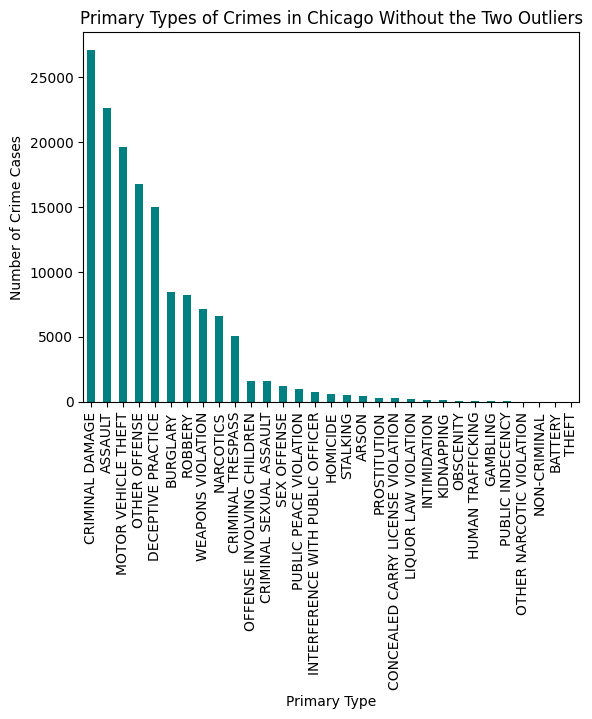

In [6]:
# Removing the ourlier
without_outlier = chicago_crimes[(chicago_crimes['Primary Type'] != 'THEFT') & (chicago_crimes['Primary Type'] != 'BATTERY')]
without_outlier['Primary Type'].value_counts().plot(kind='bar', color='teal')
plt.title('Primary Types of Crimes in Chicago Without the Two Outliers')
plt.ylabel('Number of Crime Cases')
plt.show()

<h2>
    <strong><i>INSIGHT 3: </i></strong> 
    As we can see from the graph, the records of the types of crime is rather low but meaningful from the two outliers yet they still hold a significant truth that there are so many crimes happening. 
    <a href=https://www.720ilcs-criminal-lawyer.com/practice-areas/720-ilcs-5-21-1>Criminal damage</a> to property is a significant offense in Illinois that involves intentionally damaging, defacing, or destroying someone else’s property without their consent. Also, it holds the top 3 among the primary type of crimes.
</h2>

<h1 style='color:#157375'>Since Theft is the usual crime, what time does it happen frequently?</h1>

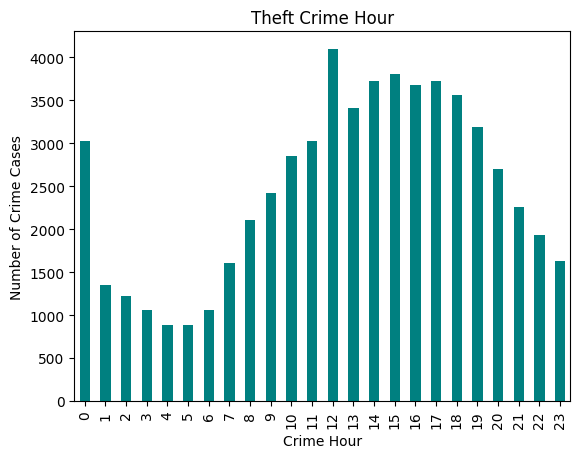

In [7]:
theft = chicago_crimes[chicago_crimes['Primary Type'] == 'THEFT']
theft_time = theft.groupby('Crime Hour').size()
theft_time.plot(kind='bar', color='teal')
plt.title('Theft Crime Hour')
plt.ylabel('Number of Crime Cases')
plt.show()

<h2>
    <strong><i>INSIGHT 4: </i></strong> 
    The result shows that theft usually happens at <strong>12:00 in the afternoon</strong>, we can conclude that its because it's lunch time and most of the employees/owners are distracted at this hour.
</h2>

<h2>
    <strong><i>INSIGHT 5: </i></strong> 
    Another thing, we can see that from 6AM to the whole day there is a high rate of cases, then 6pm onwards it slowly dies down hour by hour, then it <strong>strikes again at 12 midnight</strong> which makes sense because it an hour that most of the people are already sleeping soundly. Then, there is a low number of theft during 1AM to 5AM.
</h2>

<h2>
    <strong><i>INSIGHT 6: </i></strong> 
    Overall, we can conclude that <strong>thefts can barge in at any time</strong>, literally all day and night has a number of cases of theft that's why it is really important to lock our houses/stores tightly.
</h2>

<h1 style='color:#157375'>To further analyze this, I want to know the crime distribution for the AM and PM using pie chart.</h1>

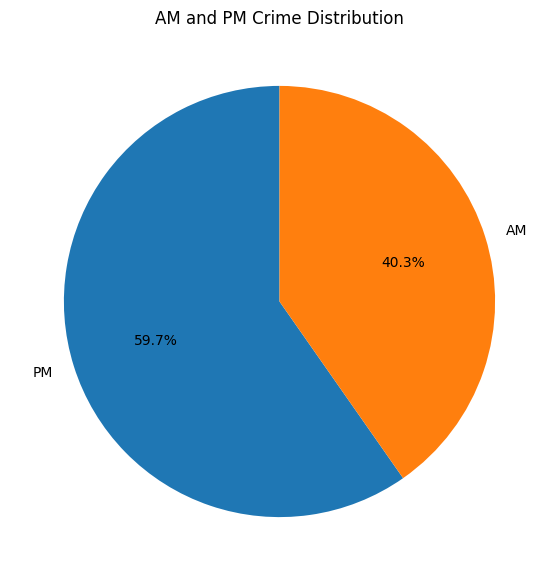

In [8]:
chicago_crimes['AM_PM'] = chicago_crimes['Date'].dt.strftime('%p')
am_pm_counts = chicago_crimes['AM_PM'].value_counts()
plt.pie(am_pm_counts, labels=am_pm_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('AM and PM Crime Distribution')
plt.show()

<h2>
    <strong><i>INSIGHT 7: </i></strong> 
    As we can see, most of the crimes were done in the <strong>afternoon with 59.7%</strong>, which greatly proves the other visualization earlier. While the <strong>AM proportion is at 40.3%</strong>, which is also a great number. It shows that even morning, dawn, afternoon, night, we are not safe from these crimes.
</h2>

<h1 style='color:#157375'>How many crimes are domestic and not?</h1>

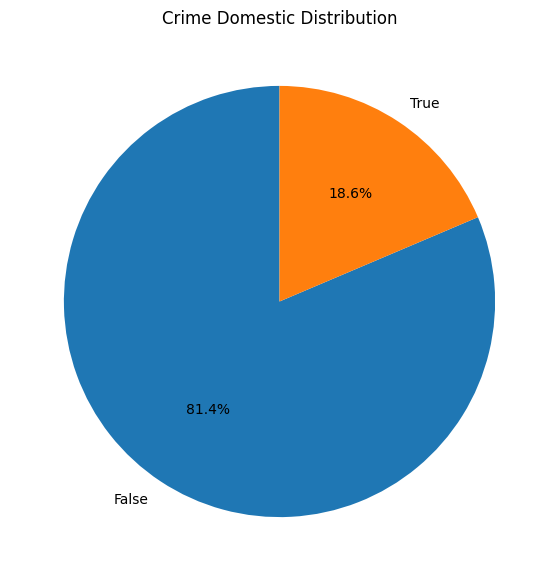

In [9]:
domestic_counts = chicago_crimes['Domestic'].value_counts()
plt.pie(domestic_counts, labels=domestic_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Crime Domestic Distribution')
plt.show()

<h2>
    <strong><i>INSIGHT 8: </i></strong> 
    Based on the result, most of the crimes are not domestic-related though it is still now zero. The <strong>non-domestic record garners 81.4%</strong> which means most of the crimes happens just generally, like a stranger commiting a crime. According to
    <a href='https://counciloncj.org/crime-in-chicago-what-you-need-to-know/'>CCJ</a>, Chicago’s declines mirror patterns of reported violent crime in other large cities across the country, but the level of violent crime in the city <strong>remains substantially higher than the average</strong> in our sample, and some property crime levels are still higher than they were before the pandemic.
</h2>

<h2>
    <strong><i>INSIGHT 9: </i></strong> 
    While the <strong>domestic-related crimes has a rate of 18.6%</strong> which means there is still a portion of crimes that happens within a household. 
    <a href='https://www.cbsnews.com/chicago/news/domestic-violence-chicago-violent-crime-stats-federal-funds/'>Domestic violence</a> is not unique to Chicago. A CBS News analysis of FBI victimization data found that 24% of the country's nearly 4 million violent crimes last year were domestic. Chicago's proportion is slightly higher at 26%. 
</h2>

<h1 style='color:#157375'>Out of the primary types, did the criminals get arrested or not?</h1>

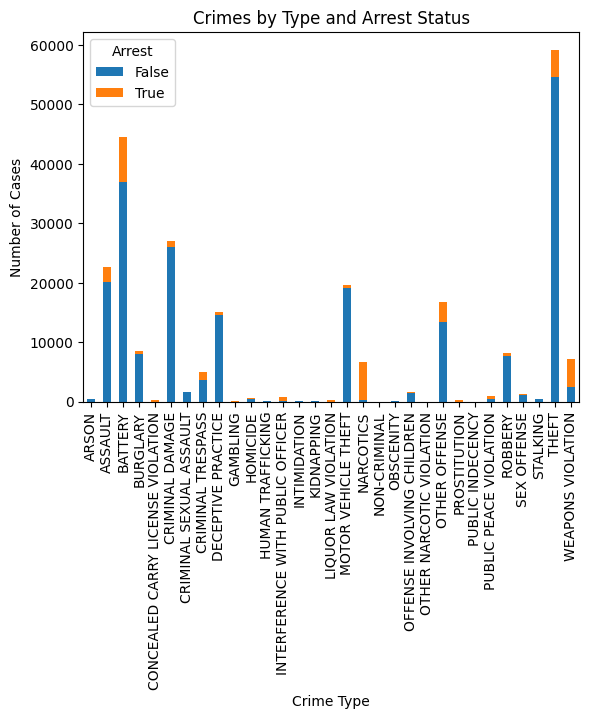

In [10]:
arrested_or_not = chicago_crimes.groupby(['Primary Type','Arrest']).size().unstack()
arrested_or_not.plot(kind='bar', stacked='True')
plt.title("Crimes by Type and Arrest Status")
plt.xlabel("Crime Type")
plt.ylabel("Number of Cases")
plt.show()

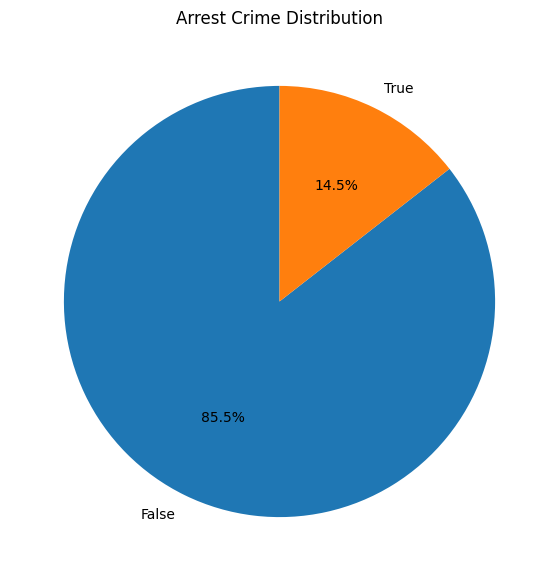

In [11]:
arrest_counts = chicago_crimes['Arrest'].value_counts()
plt.pie(arrest_counts, labels=arrest_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Arrest Crime Distribution')
plt.show()

<h2>
    <strong><i>INSIGHT 10: </i></strong> 
    First of all, OMG, that is literally my reaction when I first saw the graph. It shows that there is huge gap between the two arrest status.
</h2>
<h2>
    <strong><i>INSIGHT 11: </i></strong> 
    Second, we can see that <strong>most of the crimes in Chicago were unsolved</strong>, it did not result in a immediate arrest of the people who commited the crime. At first, I was like "The criminals got away like nothing happened?!", but after analyzing it futhermore, the huge gap could mean a few circumstances.
    <ol>
        <li>The criminal has not been identified yet.</li>
        <li>Lack of evidence.</li>
        <li>The investigation is still on-going.</li>
        <li>Socioeconomic status issues.</li>
    </ol>
</h2>
<h2>
    <strong><i>INSIGHT 12: </i></strong> 
    Third, the narcotics crime is the only one has that has almost full arrest status being 'true', maybe it's because the whole world is fighting against illegal drugs.
</h2>
<h2>
    <strong><i>INSIGHT 13: </i></strong> 
    Fourth, almost of them has a small portion each of True which means that maybe those smalled chunks are the criminals who really got caught redhanded which led to an immediate action. But, the huge portion of the unarrested cases is bothersome, it could only mean two things: 1. The criminals got away before someone sees them; 2. The victims are powerless to take action, maybe due to money, and many other more circumstances.
</h2>

<h2>
    <strong><i>INSIGHT 14: </i></strong> 
    Fifth, the pie chart shows the great protion of <strong>unarrested cases with 85.5%</strong>, and the <strong>immediate arrest with only 14.5%</strong>. Using the pie chart, we can totally see the uneven proportion of the two status. The gap is concerning but we can't really judge because we don't know the other side pf the story yet.
</h2>

<h2>
    <strong><i>INSIGHT 15: </i></strong> 
    Overall, this graph showed us the hard truth of unfairness and unsafety. If this is the case in Chicago, what more on the other country? Especially our nation.
</h2>

<h1 style='color:#157375'>What is the crime trends over time?</h1>

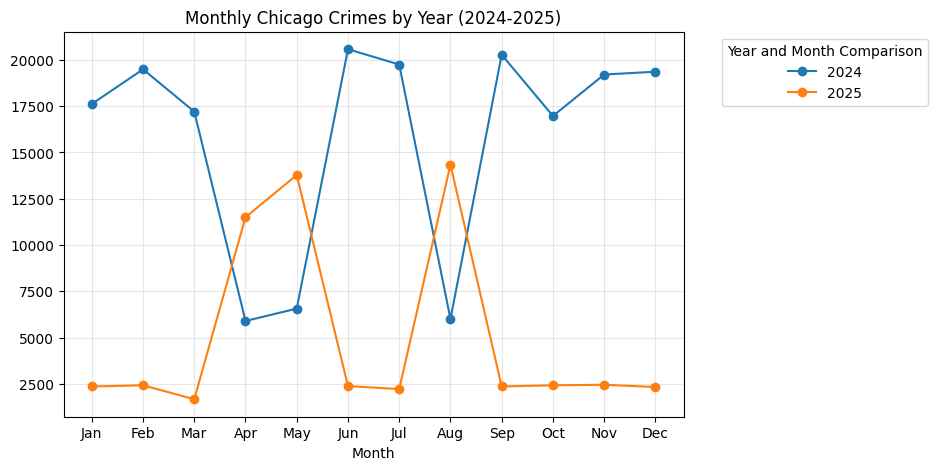

In [12]:
monthly_crime = chicago_crimes.groupby(['Year', 'Month']).size()
monthly_crime = monthly_crime.unstack(level=0)
monthly_crime.plot(marker='o', title='Monthly Chicago Crimes by Year (2024-2025)', figsize=(8,5))
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h2>
    <strong><i>INSIGHT 16: </i></strong> 
    For the year 2024, we can see that it start off high, it drop at April and May then strikes again by June and July, then drops again on August, and strikes again from September until the year ends. However, according to an 
    <a href='https://crimelab.uchicago.edu/resources/2024-end-of-year-analysis-chicago-crime-trends/'>analysis</a>, this year in Chicago, murders and non-fatal shootings <strong>continued to decline from their recent peak in 2020 and 2021</strong>. Despite these encouraging trends, Chicago continues to grapple with inequities tied to race and geography, as well as increased violent crime on aggregate. 
</h2>

<h2>
    <strong><i>INSIGHT 17: </i></strong> 
    Meanwhile, for the 2025, it start off low until March, it went up on April and May, then drop at June and July, then it strikes again on August, and drops again on September until December but it might change -hopefully not- since the year is still on-going. According to the
    <a href='https://www.theglobalstatistics.com/crime-in-chicago-by-neighborhood/'>analysis</a> I've read, <strong>Chicago sees historic drop</strong> in violent crime during first half of 2025 and 32% decrease in homicides, 240 total homicides through July, and 8,227 violent crimes demonstrate overall progress.
</h2>

<h2>
    <strong><i>INSIGHT 18: </i></strong> 
    The comparison looks like they are mirroring each other. They are completely opposite to one another. The good thing is, on 2025, there is a big progress on the data. to conclude, the trend of crimes in Chicago over the year and month is inconsitent but if we read some analytics from official website, the trend is somehow decreasing, and it led to now which has a big drop from the opening of the year 2025.
</h2>

<h1 style='color:#157375'>Compare the number of cases per day of week and the number of cases of theft only.</h1>

Text(0.5, 1.0, 'Theft per Day of Week')

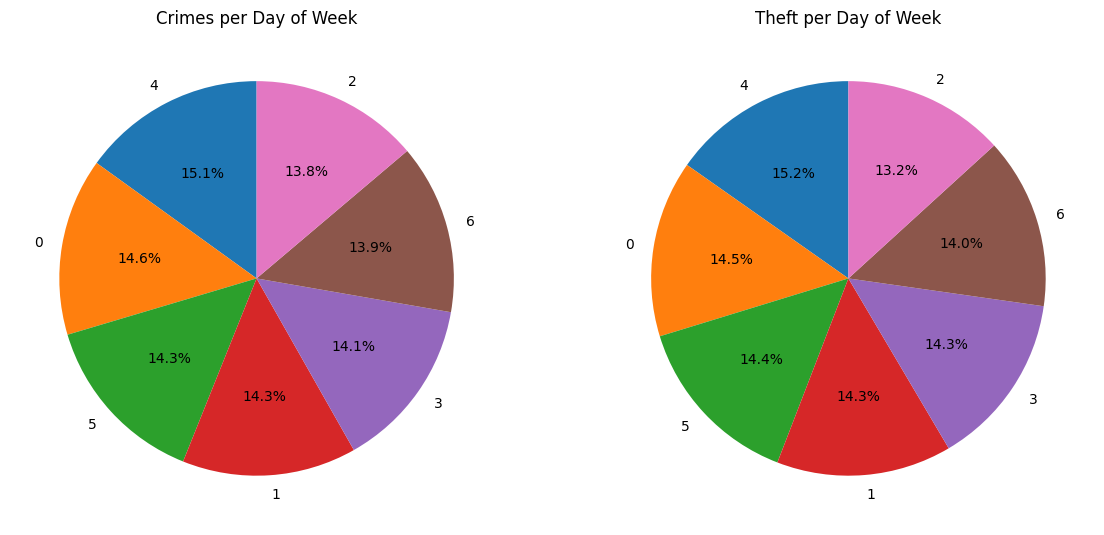

In [13]:
crimes_per_week = chicago_crimes['DayOfWeek'].value_counts()
theft_per_week = chicago_crimes[chicago_crimes['Primary Type'] == 'THEFT']
weeklytheft = theft_per_week['DayOfWeek'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# For crimes per week
axes[0].pie(crimes_per_week, labels=crimes_per_week.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title("Crimes per Day of Week")

# In comparison to the distribution cases of theft per week
axes[1].pie(weeklytheft, labels=crimes_per_week.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Theft per Day of Week")

<h2>
    <strong><i>INSIGHT 19: </i></strong> 
    In terms of the number of crimes per day of week, the <strong>proportions are very close to each other</strong> that it looks like they are being distributed equally. The numbers are very close that we can think that the number of cases next day is somehow the same number of record the previous day. Friday garnered the highest rate with 15.1%. There is a
    <a href='https://www.fox32chicago.com/news/12-arrested-after-downtown-chicago-teen-gathering-turns-violent'>news</a> about some teens being arrested on a friday night which led to two violent incidents. While, Wednesday has the lowest rate of cases among them with 13.8%.
</h2>

<h2>
    <strong><i>INSIGHT 20: </i></strong> 
    On the other hand, the cases of theft per day of the week is also very close to each other which is kinda scary because it means a lot of theft are happening each day in Chicago and <strong>there's no like a "rest-day" for these thieves</strong>. The same as the general analysis, Wednesday has the lowest rate too at 13.2%, and Saturday being the usual day also for theft at 15.2%. To prove this statement, here is a 
    <a href='https://abc7chicago.com/post/chicago-crime-chopper-7-police-response-train-tracks-austin-west-side-live/15418107/'>news</a> about a railway cargo theft Friday afternoon on the city's West Side, Chicago.
</h2>

<h2>
    <strong><i>INSIGHT 21: </i></strong> 
    To conclude, we can say that there is <strong>no 'safe day' for these crimes</strong>, and the numbers being close to each other is frightening because imagine the number of crimes that are happening each day in Chicago, and the fear of the ordinary people each day :(
</h2>

<h1 style='color:#157375'>Let's now compare the number of cases per month on a general analysis and a theft-focused.</h1>

Text(0.5, 1.0, 'Theft per Month')

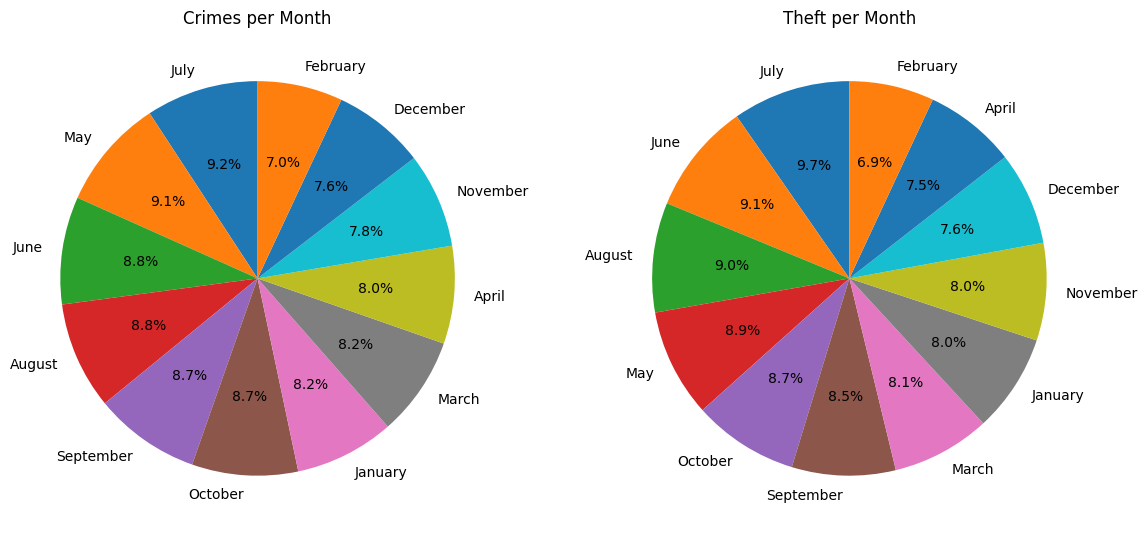

In [14]:
crimes_per_month = chicago_crimes['Month'].value_counts()
theft_per_month = chicago_crimes[chicago_crimes['Primary Type'] == 'THEFT']
monthlytheft = theft_per_month['Month'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# For crimes per month
axes[0].pie(crimes_per_month, labels=crimes_per_month.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title("Crimes per Month")

# For theft crimes per month
axes[1].pie(monthlytheft, labels=monthlytheft.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Theft per Month")

<h2>
    <strong><i>INSIGHT 22: </i></strong> 
    On the general analysis, <strong>May and July has the highest proportions</strong> of crimes with only a 0.1 difference. With July being the highest, I have searched for news that would support this statement, and I have found that Chicago was plagued by <a href='https://www.nbcnews.com/news/us-news/chicago-reels-bloody-july-4-weekend-109-people-shot-19-fatally-rcna160825'>bloodshed during the long Fourth of July</a> holiday weekend, when 109 people were shot and 19 were killed, authorities said.
</h2>

<h2>
    <strong><i>INSIGHT 23: </i></strong> 
    On the theft-focused analysis, it is the same with the general analysis, <strong>July being the highest with 9.7% and February with 6.9% (lowest)</strong>. Since Theft is the mosy usual crime case, I think it makes sense that the result is close related to the general analysis because theft makes up the highest portion for it.
</h2>

<h1 style='color:#157375'>What about in terms of per day of month?</h1>

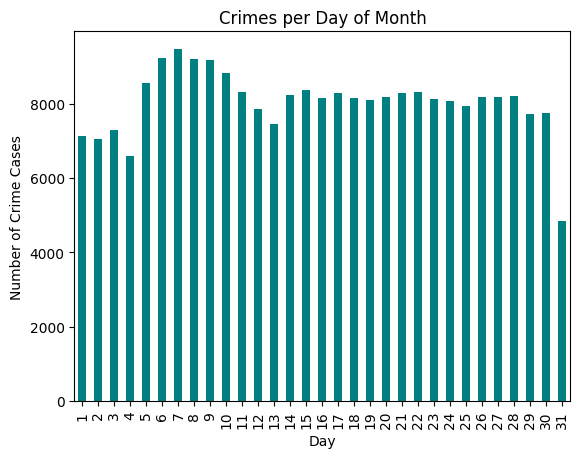

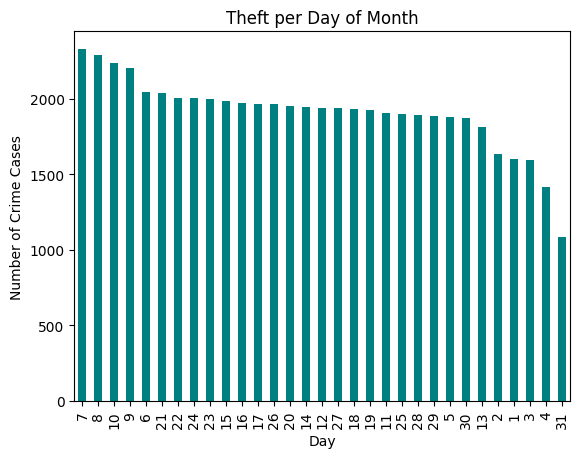

In [15]:
# For crimes per day of month
crimes_per_dayofmonth = chicago_crimes.groupby('Day').size()
crimes_per_dayofmonth.plot(kind='bar', color='teal')
plt.title("Crimes per Day of Month")
plt.ylabel('Number of Crime Cases')
plt.show()

theft_again = chicago_crimes[chicago_crimes['Primary Type'] == "THEFT"]
theft_dayofmonth = theft_again['Day'].value_counts()
theft_dayofmonth.plot(kind='bar', color='teal')
plt.title("Theft per Day of Month")
plt.ylabel('Number of Crime Cases')
plt.show()

<h2>
    <strong><i>INSIGHT 24: </i></strong> 
    Same with the previous comparison, the general analysis and theft-focused analysis for the day of the month does not differ from each other. Both of them has the <strong>7th day being the highest, and 31 being the lowest</strong>. I've searched on web if there was any special occasion on the 7th day and there was, so maybe it is just general. Then for the 31st, maybe it is because now all months have 31st, it could be the answer why it was the lowest.
</h2>

<h1 style='color:#157375'>What is the common description for the types of crimes?</h1>

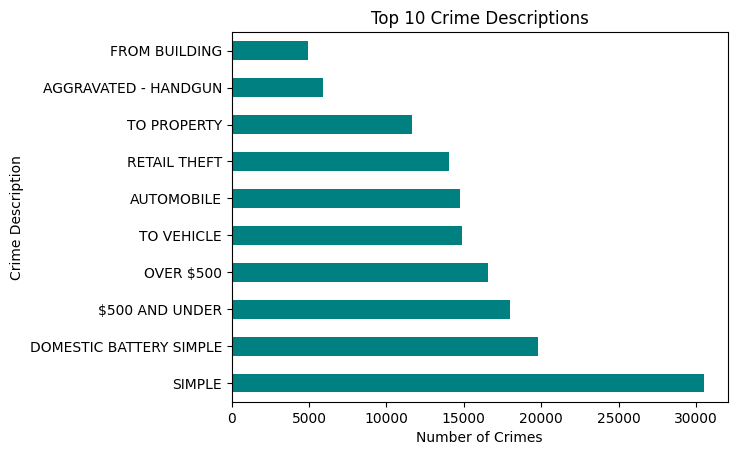

In [16]:
chi_crime = chicago_crimes['Description'].value_counts().head(10)
chi_crime.plot(kind='barh', color='teal')
plt.title("Top 10 Crime Descriptions")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Description")
plt.show()

<h2>
    <strong><i>INSIGHT 25: </i></strong> 
    For the description, this is where the types of crimes are being splitted into sub categories. At first I was confused because the "Simple" (battery) was the top1 and not about theft (#1 crime overall). Okay, let's go through the graph one by one. The <strong>Simple description garnered the highest number</strong>, it is related to battery (Any physical attack / harmful or offensive physical contact). Simple battery is a physical attack with no weapons, and we can see that in Chicago, it is the top1 crime description.
</h2>

<h2>
    <strong><i>INSIGHT 26: </i></strong> 
    The <strong>Top2</strong> is still related to battery, but it is <strong>domestic-related</strong> this time. An 
    <a href='https://www.newsbreak.com/crime/chicago-il/37360_1755743307_mljddttg-domestic-battery-incidents-reported-in-chicago'>article</a> mentioned that there are reports of domestic battery incidents at multiple locations in Chicago, specifically mentioning ongoing attacks.
</h2> 

<h2>
    <strong><i>INSIGHT 27: </i></strong> 
    From <strong>top3 to top 10 except top9 is all theft-related</strong>. In the description, theft-related isnt the top1 because theft can be done in many ways that's why it has dominated this graph. For the Top9, it is about the threatening someone or causing injury to someone using a gun, which could also be theft-related.
</h2> 

<h1 style='color:#157375'>Where do these crimes usually happen?</h1>

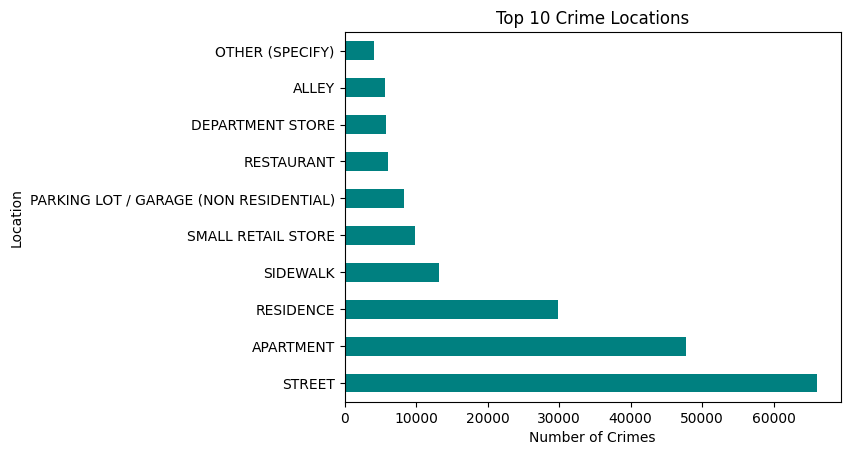

In [17]:
crime_loc = chicago_crimes['Location Description'].value_counts().head(10)
crime_loc.plot(kind='barh', color='teal')
plt.title("Top 10 Crime Locations")
plt.xlabel("Number of Crimes")
plt.ylabel("Location")
plt.show()

<h2>
    <strong><i>INSIGHT 28: </i></strong> 
    We can see from the graph that <strong>crimes usually happens on the street</strong>. Second and third most location is apartment and residence which is the houses of the victims. 
</h2> 

<h1 style='color:#157375'>Now that we see the top 10 descritions and location, let's combine them to know what crimes usually happens in certain location.</h1>

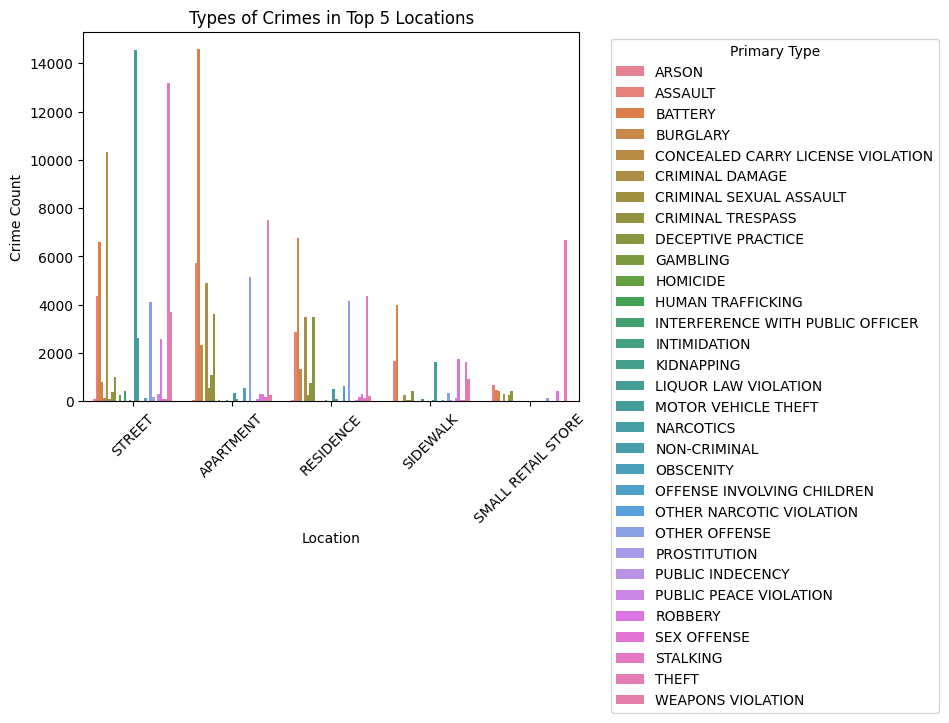

In [18]:
top_loc = chicago_crimes['Location Description'].value_counts().head(5).index
subset = chicago_crimes[chicago_crimes['Location Description'].isin(top_loc)]

sns.countplot(data=subset, x='Location Description', hue='Primary Type', order=top_loc)
plt.title("Types of Crimes in Top 5 Locations")
plt.xlabel("Location")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend(title="Primary Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [19]:
#this is kinda hard to distinguish because the colors are so alike, ill make another one, ill make the primary type to top5 as well.

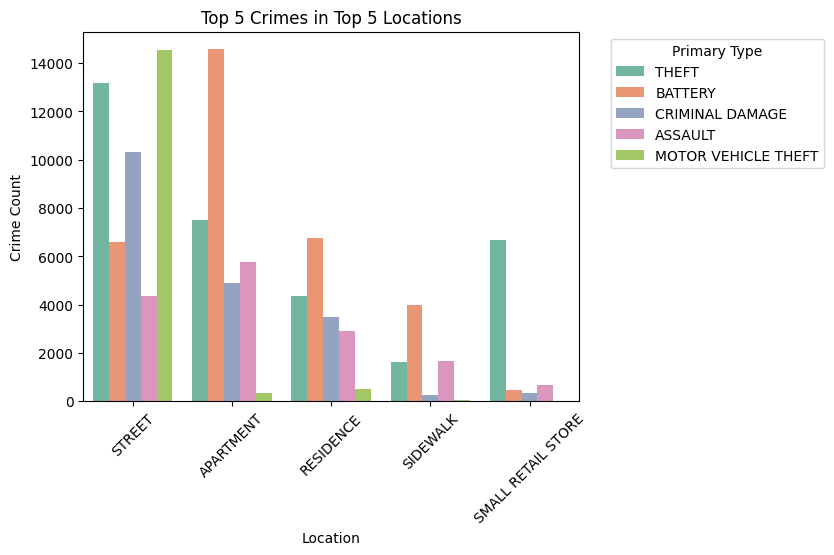

In [20]:
top5_locs = chicago_crimes['Location Description'].value_counts().head(5).index
top5_crimes = chicago_crimes['Primary Type'].value_counts().head(5).index

subset = chicago_crimes[(chicago_crimes['Location Description'].isin(top5_locs)) & (chicago_crimes['Primary Type'].isin(top5_crimes))]

sns.countplot(
    data=subset,
    x='Location Description',
    hue='Primary Type',
    order=top5_locs,
    hue_order=top5_crimes,
    palette="Set2"
)

plt.title("Top 5 Crimes in Top 5 Locations")
plt.xlabel("Location")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend(title="Primary Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h2>
    <strong><i>INSIGHT 29: </i></strong> 
    Here, we can that each location have different usual types of crimes. <strong>For the streets, it has been dominated by motor vehicle theft</strong> and theft in general. According to 
    <a href='https://www.cbsnews.com/chicago/news/chicago-drop-in-auto-thefts-new-concern-numbers-certain-vehicles/'>CBS News</a>CBS News, Motor vehicle thefts, overall, dropped 27% in 2024, according to a CBS News Chicago analysis of Chicago Police data. It says there already been a dropped to this type of theft which we can think of how high was the rate of the previous years.
</h2> 

<h2>
    <strong><i>INSIGHT 30: </i></strong> 
    For the <strong>apartment location, it was dominated by battery</strong>, it might be simple or domestic-related battery. Theft is also the second-most here. Same goes with residence location, bettery is also the highest case, as well as the sidewalk.
</h2> 

<h2>
    <strong><i>INSIGHT 31: </i></strong> 
    Moreover, <strong>theft dominated the charts for small retail stores</strong>. We can conclude that most of the stores especially the small retail ones are being infested by theives.
</h2>

<h1 style='color:#157375'>Since we have compared the top5 primary types, lets now boil it down to the top5 description.</h1>

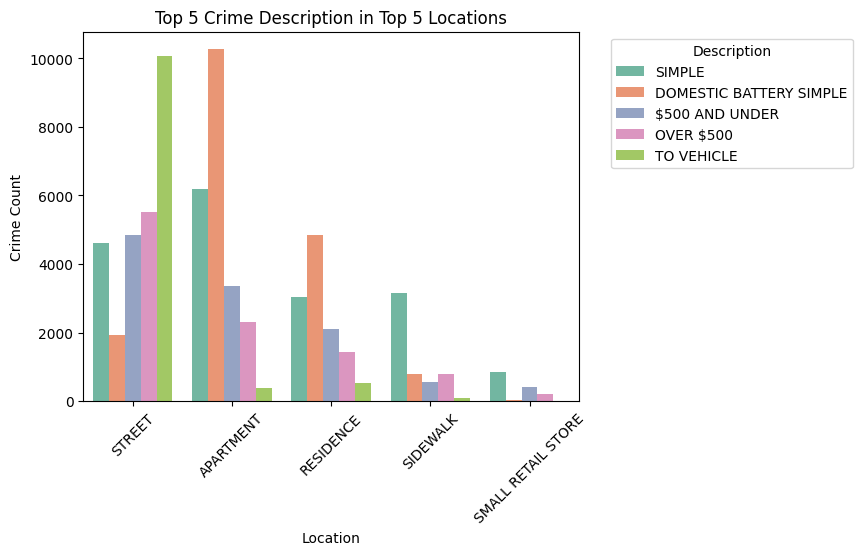

In [21]:
top5_locs = chicago_crimes['Location Description'].value_counts().head(5).index
top5_desc = chicago_crimes['Description'].value_counts().head(5).index

subset = chicago_crimes[(chicago_crimes['Location Description'].isin(top5_locs)) & (chicago_crimes['Description'].isin(top5_desc))]

sns.countplot(
    data=subset,
    x='Location Description',
    hue='Description',
    order=top5_locs,
    hue_order=top5_desc,
    palette="Set2"
)

plt.title("Top 5 Crime Description in Top 5 Locations")
plt.xlabel("Location")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend(title="Description", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h2>
    <strong><i>INSIGHT 32: </i></strong> 
    On our general analysis earlier, the streets have been domiated by motor vehicle theft, which is related to this description-focused 'to vehicle' (they differ in a way that to'vehicle' means stealing items inside a vehicle, not stealing the vehicle itself, it is still theft nontheless) which means most of the crimes happening on the streets are related to vehicle thefts.
</h2> 

<h2>
    <strong><i>INSIGHT 33: </i></strong> 
    The apartment earlier was dominated by battery and we can see here the actual description of the crime. Most of the apartment-related crimes was about domestic battery simple, meaning it is a crime within a household, being done by a family member to a family member as well, and the 'simple' means it is causing injury to a person without the use of weapons. To think that the battery was domestic-related was awful :(. Simple battery is second-most. This is the case in residence areas as well.
</h2> 

<h2>
    <strong><i>INSIGHT 34: </i></strong> 
    Sidewalk crimes are mostly about simple battery. The same goes with reatil store, but take note that the second-most crime here is $500 and under.
</h2>

<h1 style='color:#157375'>Where does the small portion of arrest usually happens?</h1>

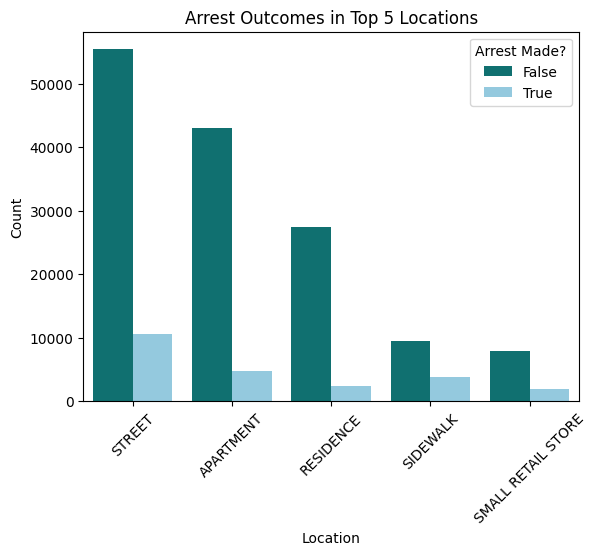

In [22]:
top_locations = chicago_crimes['Location Description'].value_counts().head(5).index
subset = chicago_crimes[chicago_crimes['Location Description'].isin(top_locations)]

sns.countplot(data=subset, x='Location Description', hue='Arrest', order=top_locations, palette=['teal','skyblue'])
plt.title("Arrest Outcomes in Top 5 Locations")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Arrest Made?")
plt.show()

<h2>
    <strong><i>INSIGHT 35: </i></strong> 
    Since we already know that most of the cases did not result in a immediate arrest, it is not surprising that this is the result of the graph. Let's focus more on the true protions. The streets crime cases has like a 10,000 records which is good, it is not the number I was expecting but at least it is not zero. For the rest of the locations, the <strong>arrest cases has a very small rate</strong>.
</h2>

<h1 style='color:#157375'>Let's now see when does these crimes usually happening.</h1>

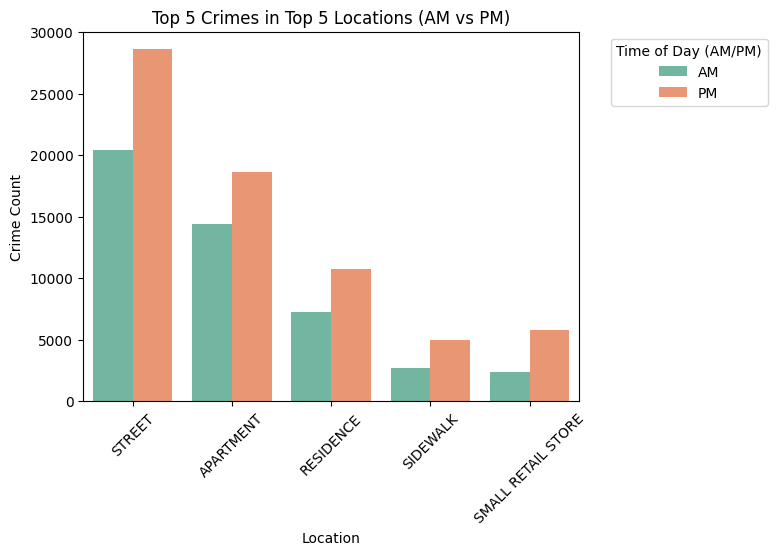

In [23]:
chicago_crimes['AMPM'] = chicago_crimes['Date'].dt.strftime('%p')

top5_locs = chicago_crimes['Location Description'].value_counts().head(5).index
top5_crimes = chicago_crimes['Primary Type'].value_counts().head(5).index

subset = chicago_crimes[(chicago_crimes['Location Description'].isin(top5_locs)) & (chicago_crimes['Primary Type'].isin(top5_crimes))]

sns.countplot(
    data=subset,
    x='Location Description',
    hue='AMPM',           
    order=top5_locs,
    palette="Set2"
)

plt.title("Top 5 Crimes in Top 5 Locations (AM vs PM)")
plt.xlabel("Location")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend(title="Time of Day (AM/PM)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<div style="display:flex; align-items:flex-start;">
    <img src='https://i.ytimg.com/vi/eKiFoVt33m8/maxresdefault.jpg' width=400px style="margin-right:20px;>
    <h2>
        <strong><i>INSIGHT 36: </i></strong> 
        Well, we can see that most of the crimes happens in the afternoon but the portions of the AM is also big, so we can conclude that most of the suspects aren't afraid to be caught in broad daylight. 
        <br><br>
        The picture is an actualy crime happening in broad daylight. I saw it on a news about 
        <a href='https://abc7chicago.com/post/chicago-crime-chopper-7-police-response-train-tracks-austin-west-side-live/15418107/'>railway cargo theft</a>
    </h2>
</div>

<div style="display:flex; align-items:flex-start;">
    <img src="https://i.ytimg.com/vi/eKiFoVt33m8/maxresdefault.jpg" width="400px" style="margin-right:20px;">
    <h2>
        <strong><i>INSIGHT 36: </i></strong> 
        Well, we can see that most of the crimes happens in the afternoon but the portions of the AM is also big, so we can conclude that most of the suspects aren't afraid to be caught in broad daylight. 
        <br><br>
        The picture is an actual crime happening in broad daylight. I saw it on a news about 
        <a href="https://abc7chicago.com/post/chicago-crime-chopper-7-police-response-train-tracks-austin-west-side-live/15418107/">railway cargo theft.</a>
    </h2>
</div>

<h1 style='color:#157375'>Lets put the top 5 locations in heatmaps.</h1>

In [24]:
subset = subset.dropna(subset=['Latitude', 'Longitude'])

subset = chicago_crimes[
    (chicago_crimes['Location Description'].isin(top5_locs)) &
    (chicago_crimes['Primary Type'].isin(top5_crimes))
]

crime_coordi = list(zip(subset['Latitude'], subset['Longitude']))
m = folium.Map(location=[subset['Latitude'].mean(), subset['Longitude'].mean()], zoom_start=10)
HeatMap(crime_coordi).add_to(m)
m

<h2>
    <strong><i>INSIGHT 37: </i></strong> 
    The heat making an elongated shape, meaning the <strong>crimes are being scattered everyhwere</strong>, and if you zoomed it you can see a bunch of small dots on the streets, on a residence, basically just everywhere. Additionaly, most of the crime dots are not so far away from each which can mean that a crime that happen in one place many times. 
</h2>

<h1 style='color:#157375'>In terms of the updated on, how many days before a case been updated?</h1>

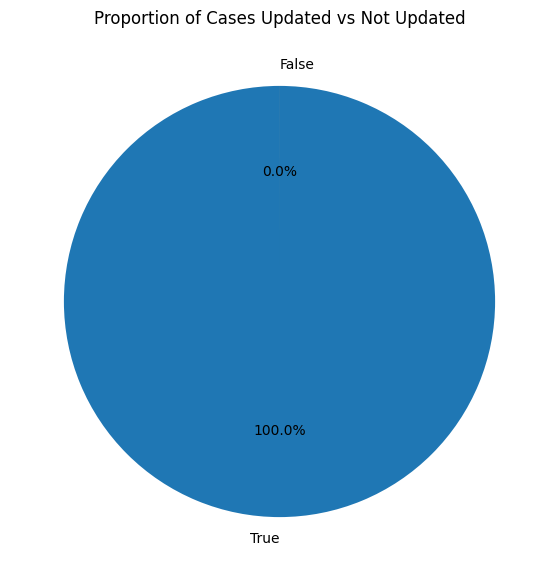

In [25]:
chicago_crimes['Updated On'] = pd.to_datetime(chicago_crimes['Updated On'], errors='coerce')
ud = chicago_crimes['Updated Again'] = chicago_crimes['Date'].dt.date != chicago_crimes['Updated On'].dt.date
update_counts = chicago_crimes['Updated Again'].value_counts()
plt.pie(update_counts, labels=update_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Proportion of Cases Updated vs Not Updated')
plt.show()

<h2>
    <strong><i>INSIGHT 38: </i></strong> 
    We can see that <strong>all the cases have been updated 100%</strong>. it could mean that if there was a need to modify something about the case or to add additional information they would update the dateset.
</h2>

<h1 style='color:#157375'>How many days does it take when a case gets updated?</h1>

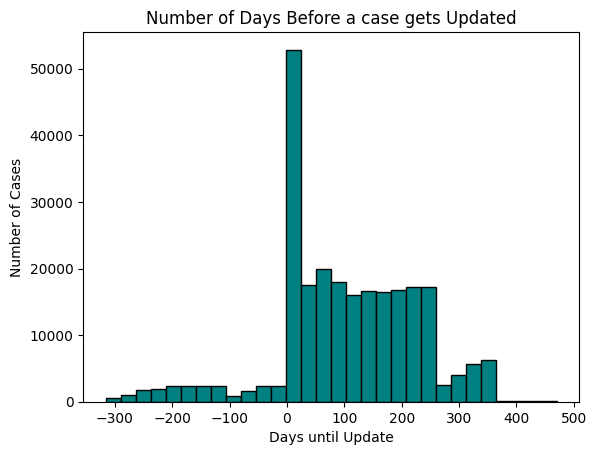

In [26]:
chicago_crimes['Update_delay'] = (chicago_crimes['Updated On'] - chicago_crimes['Date']).dt.days

chicago_crimes['Update_delay'].dropna().plot(kind='hist', bins=30, color='teal', edgecolor='black')
plt.title("Number of Days Before a case gets Updated")
plt.xlabel("Days until Update")
plt.ylabel("Number of Cases")
plt.show()

<h2>
    <strong><i>INSIGHT 39: </i></strong> 
    The tall line means <strong>most of the cases are being updated on the same date</strong>, like for corrections or additional infomation from the victims/suspects. 
</h2>

<h2>
    <strong><i>INSIGHT 40: </i></strong> 
    Additionally, we can also see that there are <strong>cases that takes 10 days to approximately 400 days</strong> (weeks, months, or year) before it gets updated. It usually happens when a case are reopened or suspects have been arrested or the details have been changed after an investigation.
</h2>